In [1]:
!pip install pydicom

import os
import pydicom
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import ipywidgets as widgets
import nibabel as nib
import numpy as np
import pyarrow.parquet as pq

from IPython.display import HTML
from tqdm import tqdm

import seaborn as sb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 14.8 MB/s eta 0:00:00


In [2]:
from google.colab import drive
import os

def mount_and_navigate_to_dir(directory_path="/content/drive/MyDrive/rsna_data/"):
    """
    Mount Google Drive and navigate to a specific directory.

    Args:
    - directory_path (str): The directory to navigate to after mounting.
    """
    ROOT = "/content/drive"
    drive.mount(ROOT, force_remount=True)
    os.chdir(directory_path)
    print(f"Current directory: {os.getcwd()}")

mount_and_navigate_to_dir()

Mounted at /content/drive
Current directory: /content/drive/MyDrive/rsna_data


In [3]:
TRAIN_CSV = "train.csv"
data = pd.read_csv(TRAIN_CSV)
print("patient_id 개수:", data.shape[0])
injury = data['any_injury'].value_counts()
print("healthy/injury 개수:\n",injury)
data.head(10)

patient_id 개수: 3147
healthy/injury 개수:
 0    2292
1     855
Name: any_injury, dtype: int64


,patient_id,bowel_healthy,bowel_injury,extravasation_healthy,extravasation_injury,kidney_healthy,kidney_low,kidney_high,liver_healthy,liver_low,liver_high,spleen_healthy,spleen_low,spleen_high,any_injury
0,10004,1,0,0,1,0,1,0,1,0,0,0,0,1,1
1,10005,1,0,1,0,1,0,0,1,0,0,1,0,0,0
2,10007,1,0,1,0,1,0,0,1,0,0,1,0,0,0
3,10026,1,0,1,0,1,0,0,1,0,0,1,0,0,0
4,10051,1,0,1,0,1,0,0,1,0,0,0,1,0,1
5,10065,0,1,1,0,1,0,0,1,0,0,1,0,0,1
6,10082,1,0,1,0,1,0,0,1,0,0,1,0,0,0
7,10104,1,0,1,0,1,0,0,1,0,0,1,0,0,0
8,10105,1,0,1,0,1,0,0,1,0,0,1,0,0,0
9,10124,1,0,1,0,1,0,0,1,0,0,1,0,0,0


In [ ]:
correct = 0
for idx, row in data.iterrows():
    if row['bowel_injury'] + row['extravation_injury'] + row['kidey_low'] + row['kidey_high'] + row['liver_low'] + row['liver_high'] + row['spleen_low'] + row['spleen_high'] > 0:
      if row['any_injury'] = 1:
      count +=1

In [ ]:
TRAIN_CSV = "train_series_meta.csv"
data = pd.read_csv(TRAIN_CSV)
print("series_id 개수:", data.shape[0])
unique_values = data['patient_id'].unique()
print("patient_id 개수:", unique_values.shape[0])
incomplete_organ = data['incomplete_organ'].value_counts()
print("incomplete_organ 개수:\n",incomplete_organ)
data.head(50)

series_id 개수: 4711
patient_id 개수: 3147
incomplete_organ 개수:
 0    4398
1     313
Name: incomplete_organ, dtype: int64


,patient_id,series_id,aortic_hu,incomplete_organ
0,10004,21057,146.00,0
1,10004,51033,454.75,0
2,10005,18667,187.00,0
3,10007,47578,329.00,0
4,10026,29700,327.00,0
5,10026,42932,122.00,0
6,10051,17486,345.00,0
7,10051,50172,151.00,0
8,10065,37324,163.00,0
9,10065,46839,303.00,0


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_0, *['patient_id'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_1, *['series_id'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_2, *['aortic_hu'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_3, *['incomplete_organ'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_4, *['patient_id'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_5, *['series_id'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_6, *['aortic_hu'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_7, *['incomplete_organ'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_8, *[[['patient_id', 'series_id'], ['series_id', 'aortic_hu'], ['aortic_hu', 'incomplete_organ']]], **{})
chart

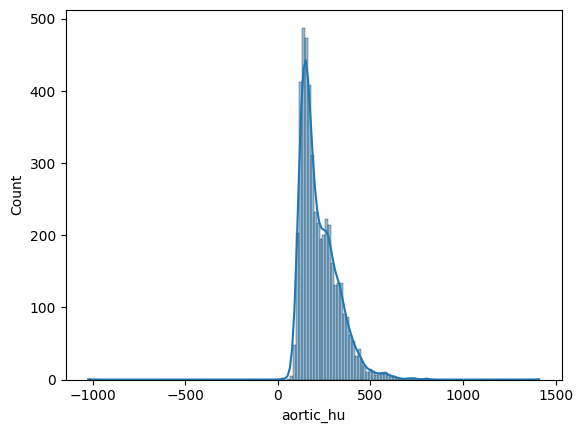

In [ ]:
sb.histplot(data['aortic_hu'], kde=True)
plt.show()

In [ ]:
train_folder = 'train_images'
file_count = len([f for f in os.listdir(train_folder) if os.path.isdir(os.path.join(train_folder, f))])
print(f"폴더 '{train_folder}' 안에 있는 폴 개수: {file_count}")

폴더 'train_images' 안에 있는 폴 개수: 3187


In [ ]:
segmentation_folder = 'segmentations'
file_count = len([f for f in os.listdir(segmentation_folder) if f.endswith('.nii')])
print(f"폴더 '{segmentation_folder}' 안에 있는 nii 개수: {file_count}")

폴더 'segmentations' 안에 있는 nii 개수: 206


In [ ]:
# Visualize CT scans in train_images folder
image_file = "train_images/10004/21057/1001.dcm"
ds = pydicom.read_file(image_file)
ds

Dataset.file_meta -------------------------------
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.123.12345.1.2.3.10004.1.1001
(0002, 0010) Transfer Syntax UID                 UI: RLE Lossless
(0002, 0012) Implementation Class UID            UI: 1.2.3.123456.4.5.1234.1.12.0
(0002, 0013) Implementation Version Name         SH: 'PYDICOM 2.4.0'
-------------------------------------------------
(0008, 0018) SOP Instance UID                    UI: 1.2.123.12345.1.2.3.10004.1.1001
(0008, 0023) Content Date                        DA: '20230721'
(0008, 0033) Content Time                        TM: '232531.439438'
(0010, 0020) Patient ID                          LO: '10004'
(0018, 0050) Slice Thickness                     DS: '1.0'
(0018, 0060) KVP                                 DS: '90.0'
(0018, 5100) Patient Position                    CS: 'HFS'
(002

In [ ]:
IMAGE_LEVEL_LABEL_CSV = f"image_level_labels.csv"
image_label = pd.read_csv(IMAGE_LEVEL_LABEL_CSV)
unique_values = image_label['injury_name'].unique()
print("injury_name 종류:", unique_values)

injury_name 종류: ['Active_Extravasation' 'Bowel']


In [ ]:
IMAGE_LEVEL_LABEL_CSV = f"image_level_labels.csv"
image_label = pd.read_csv(IMAGE_LEVEL_LABEL_CSV)
image_label[(image_label['patient_id'] == 10004) & (image_label['series_id'] == 21057)]

,patient_id,series_id,instance_number,injury_name
0,10004,21057,362,Active_Extravasation
1,10004,21057,363,Active_Extravasation
2,10004,21057,364,Active_Extravasation
3,10004,21057,365,Active_Extravasation
4,10004,21057,366,Active_Extravasation
5,10004,21057,367,Active_Extravasation
6,10004,21057,368,Active_Extravasation
7,10004,21057,369,Active_Extravasation
8,10004,21057,370,Active_Extravasation
9,10004,21057,371,Active_Extravasation


In [ ]:
image_folder = 'train_images/10004/21057'
images = [[filename[:-4], pydicom.read_file(os.path.join(image_folder, filename)).pixel_array] for filename in os.listdir(image_folder) if filename.endswith('.dcm') and 362 <= int(filename[:-4]) <= 416]
images = sorted(images, key=lambda x:x[0])

fig, ax = plt.subplots()
im = ax.imshow(images[0][1], cmap=plt.cm.bone)

update = lambda i : im.set_array(images[i][1])

ani = animation.FuncAnimation(fig, update, frames=range(len(images)), repeat=True)

HTML(ani.to_jshtml())

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Visualize CT segmentations in segmentations folder
nifti_file = 'segmentations/21057.nii'
img = nib.load(nifti_file)
segmentation_data = img.get_fdata()
header = img.header

# Display the shape of the data
print("Data shape:", segmentation_data.shape)

# Display header information (metadata)
print(header)

Data shape: (512, 512, 1022)
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 16384
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [   3  512  512 1022    1    1    1    1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [-1.          0.89453125  0.89453125  0.5         0.          0.
  0.          0.        ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'2203.6-dirty 2022-09-08T15:38:56+01:00'
aux_file        : b''
qform_code      : scanner
sform_code      : unknown
quatern_b       : 0.0
quatern_c       : 1

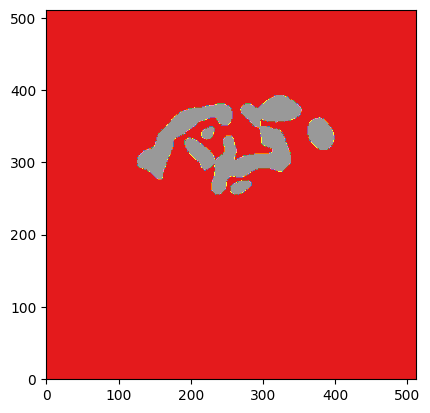

In [ ]:
fig, ax = plt.subplots()
im = ax.imshow(segmentation_data[:,:,362].T, cmap="Set1", origin="lower")

update = lambda i : im.set_array(segmentation_data[:,:,i].T)

ani = animation.FuncAnimation(fig, update, frames=range(362, 416), repeat=True)

HTML(ani.to_jshtml())

In [ ]:
# Overlay CT scans and segmentation
def clip_rescale_extract_dicom_image(dicom_ds):
    image = dicom_ds.pixel_array

    # find rescale params
    if ("RescaleIntercept" in dicom_ds) and ("RescaleSlope" in dicom_ds):
        intercept = float(dicom_ds.RescaleIntercept)
        slope = float(dicom_ds.RescaleSlope)

    # find clipping params
    center = int(dicom_ds.WindowCenter)
    width = int(dicom_ds.WindowWidth)
    low = center - width / 2
    high = center + width / 2

    image = (image * slope) + intercept
    image = np.clip(image, low, high)
    image = (image / np.max(image) * 255).astype(np.int16)
    return image

def create_3D_scans(folder, downsample_rate=1):
    filenames = os.listdir(folder)
    filenames = [int(filename.split('.')[0]) for filename in filenames]
    filenames = sorted(filenames)
    filenames = [str(filename) + '.dcm' for filename in filenames]

    volume = []
    for filename in tqdm(filenames[::downsample_rate]):
        filepath = os.path.join(folder, filename)
        ds = pydicom.dcmread(filepath)
        image = ds.pixel_array

        # find rescale params
        if ("RescaleIntercept" in ds) and ("RescaleSlope" in ds):
            intercept = float(ds.RescaleIntercept)
            slope = float(ds.RescaleSlope)

        # find clipping params
        center = int(ds.WindowCenter)
        width = int(ds.WindowWidth)
        low = center - width / 2
        high = center + width / 2

        image = (image * slope) + intercept
        image = np.clip(image, low, high)

        image = (image / np.max(image) * 255).astype(np.int16)
        image = image[::downsample_rate, ::downsample_rate]
        volume.append( image )

    volume = np.stack(volume, axis=0)
    return volume

def create_3D_segmentations(filepath, downsample_rate=1):
    img = nib.load(filepath).get_fdata()
    img = np.transpose(img, [1, 0, 2])
    img = np.rot90(img, 1, (1,2))
    img = img[::-1,:,:]
    img = np.transpose(img, [1, 0, 2])
    img = img[::downsample_rate, ::downsample_rate, ::downsample_rate]
    return img

def plot_image_with_seg(volume, volume_seg=[], orientation='Coronal'):
    if orientation == 'Coronal':
        volume = volume.transpose([1, 0, 2])
        volume_seg = volume_seg.transpose([1, 0, 2])
    elif orientation == 'Sagittal':
        volume = volume.transpose([2, 0, 1])
        volume_seg = volume_seg.transpose([2, 0, 1])
    elif orientation == 'Axial':
        pass
    else:
        print("Orientation is either 'Axial', 'Coronal' or 'Sagittal'")

    fig, ax = plt.subplots()
    im = ax.imshow(volume[0, :, :], cmap=plt.cm.bone)
    mask = np.where(volume_seg[0, :, :], volume_seg[0, :, :], np.nan)
    seg = ax.imshow(mask, cmap='Set1', alpha=0.5)

    def update(i):
        im.set_array(volume[i, :, :])
        mask = np.where(volume_seg[i, :, :], volume_seg[i, :, :], np.nan)
        seg.set_array(mask)

    ani = animation.FuncAnimation(fig, update, frames=range(len(volume)), repeat=True)
    return ani

DS_RATE = 3

filepath = 'segmentations/21057.nii'
volume_seg = create_3D_segmentations(filepath, downsample_rate=DS_RATE)
print(f'3D segmentation file shape: {volume_seg.shape}')

filepath = 'train_images/10004/21057'
volume = create_3D_scans(filepath, downsample_rate=DS_RATE)
print(f'3D Image file shape: {volume.shape}')

dicom_scan_seg = plot_image_with_seg(volume, volume_seg, orientation='Axial')
HTML(dicom_scan_seg.to_jshtml())

Output hidden; open in https://colab.research.google.com to view.